In [123]:
#necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as random
import datetime as dt

setupdirectory = "./Setup-Files/"
outdirectory = "./results/"

In [124]:
#defining the grid
cords = []
map_size = 12
for i in range(map_size):
    for j in range(map_size):
        cords.append((i, j))


#defining location of properties
number_of_properties = 10
propcords = []
for i in range(number_of_properties):
    propcords.append((random.randint(0, map_size-1), random.randint(0, map_size-1)))
print(propcords)

[(5, 4), (9, 1), (6, 2), (1, 9), (1, 3), (10, 10), (2, 6), (3, 9), (8, 0), (8, 3)]


In [125]:
#getting prop cords and values into a dataframe
props_1_2_df = pd.read_csv(setupdirectory + "Buildings_FL_E_1.2_2026.txt", sep="\s+", header=None, engine='python')
print(props_1_2_df)
props_1_2_df = props_1_2_df.rename(columns={0: "Type", 1: "x", 2: "y", 3: "value"})
print(props_1_2_df)
props_1_2_df["Cords"] = list(zip(props_1_2_df.x, props_1_2_df.y))
print(props_1_2_df)
props_1_3_df = pd.read_csv(setupdirectory + "Buildings_FL_F_1.3_2026.txt", sep="\s+", header=None, engine='python')
props_1_3_df = props_1_3_df.rename(columns={0: "Type", 1: "x", 2: "y", 3: "value"})
props_1_3_df["Cords"] = list(zip(props_1_3_df.x, props_1_3_df.y))
print(props_1_3_df)

       0   1   2   3
0      H   5  10  27
1      H   6  10  33
2      H   2   9  30
3      H   3   6  24
4      H   7   6  21
5      H  10   6  30
6      H   7   4  27
7      H   6   3  30
8      H   7   2  30
9      H   8   1  30
10  Hot.   4   5  36
11  Bank   6   5  39
12  Shop  11   2  30
13    Dr   3   8  30
14  P.O.   8   5  33
    Type   x   y  value
0      H   5  10     27
1      H   6  10     33
2      H   2   9     30
3      H   3   6     24
4      H   7   6     21
5      H  10   6     30
6      H   7   4     27
7      H   6   3     30
8      H   7   2     30
9      H   8   1     30
10  Hot.   4   5     36
11  Bank   6   5     39
12  Shop  11   2     30
13    Dr   3   8     30
14  P.O.   8   5     33
    Type   x   y  value    Cords
0      H   5  10     27  (5, 10)
1      H   6  10     33  (6, 10)
2      H   2   9     30   (2, 9)
3      H   3   6     24   (3, 6)
4      H   7   6     21   (7, 6)
5      H  10   6     30  (10, 6)
6      H   7   4     27   (7, 4)
7      H   6   3

In [126]:
def get_scs_chords():
    #propertycoordinates work like the following: the property with the coordinates (1,1) is the bottom left property, thus it covers [0,1]x[0,1], the property with the coordinates (2,1) is the property to the right of it and covers [1,2]x[0,1].
    #stormcenter coordinates are on edges of properties, thus the stormcenter with coordinates (1,1) is on the edge of the property with coordinates (1,1) and (2,1), the stormcenter with coordinates (0,0) is on the edge of the property with coordinates (0,0) and (1,0) and so on.

    scs_cords = []
    x_cord = random.randint(-4, 16)
    y_cord = random.randint(-4, 16)
    #print(f"Storm Center Cords: ({x_cord}, {y_cord})")
    dice1 = random.randint(1, 6)
    dice2 = random.randint(1, 6)
    sum_dice = dice1 + dice2
    #print(f"Dice 1: {dice1}, Dice 2: {dice2}, Sum: {sum_dice}")
    if sum_dice <= 6:
        pass
    elif sum_dice == 7:
        for i in range(0, 2):
            for j in range(0, 2):
                scs_cords.append((x_cord + i, y_cord + j))
    elif sum_dice == 8 or sum_dice == 9:
        for i in range(-1, 3):
            for j in range(-1, 3):
                scs_cords.append((x_cord + i, y_cord + j))
    elif sum_dice == 10 or sum_dice == 11:
        for i in range(-2, 4):
            for j in range(-2, 4):
                scs_cords.append((x_cord + i, y_cord + j))
    elif sum_dice == 12:
        for i in range(-4, 6):
            for j in range(-4, 6):
                scs_cords.append((x_cord + i, y_cord + j))
    #print(len(scs_cords))
    return scs_cords

print(get_scs_chords())




[(11, 11), (11, 12), (12, 11), (12, 12)]


In [127]:
def calculate_damage(scs_cords, prop_df):
    damage = 0
    types = []
    for index, row in prop_df.iterrows():
        if row["Cords"] in scs_cords:
            damage += row["value"]
            types.append(row["Type"])
    
    return damage, types

In [128]:
losses_1_2 = []
losses_1_3 = []
types_1_2_all = []
types_1_2_events = []
types_1_3_all = []
types_1_3_events = []
mean_loss_1_2 = []
mean_loss_1_3 = []
std_of_mean_loss_1_2 = []
std_of_mean_loss_1_3 = []
for i in range(1000):
    scs_cords = get_scs_chords()
    damage_1_2, types_1_2 = calculate_damage(scs_cords, props_1_2_df)
    damage_1_3, types_1_3 = calculate_damage(scs_cords, props_1_3_df)
    losses_1_2.append(damage_1_2)
    losses_1_3.append(damage_1_3)
    types_1_2_all.extend(types_1_2)
    types_1_2_events.append(types_1_2)
    types_1_3_all.extend(types_1_3)
    types_1_3_events.append(types_1_3)
    mean_loss_1_2.append(np.mean(losses_1_2))
    mean_loss_1_3.append(np.mean(losses_1_3))
    std_of_mean_loss_1_2.append(np.std(losses_1_2) / np.sqrt(len(losses_1_2)))
    std_of_mean_loss_1_3.append(np.std(losses_1_3) / np.sqrt(len(losses_1_3)))

print(f"Losses for 1.2: {losses_1_2}")
print(f"Losses for 1.3: {losses_1_3}")
print(f"types for 1.2: {types_1_2_all}")
print(f"types for 1.2 events: {types_1_2_events}")

Losses for 1.2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 90, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 189, 0, 0, 0, 0, 0, 0, 0, 213, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60, 0, 0, 60, 84, 0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 0, 30, 0, 0, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 111, 0, 0, 90, 0, 30, 0, 0, 0, 150, 30, 0, 0, 0, 0, 0, 0, 0, 66, 0, 30, 0, 0, 0, 0, 0, 60, 0, 0, 303, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60, 0, 0, 0, 0, 0, 0, 0, 0, 60, 0, 60, 0, 60, 0, 0, 0, 0, 0, 129, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 90, 0, 0, 0, 0, 0, 60, 0, 0, 0, 0, 0, 0, 0, 0, 120, 33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 0, 30, 0, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 0, 60, 0, 0, 60, 0, 0, 0, 0, 0, 60, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 120, 0, 0, 0, 0, 0, 0, 0, 0, 60, 0, 0, 30, 0, 0, 0, 0, 0, 0, 0, 0, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60, 60, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 120, 0,

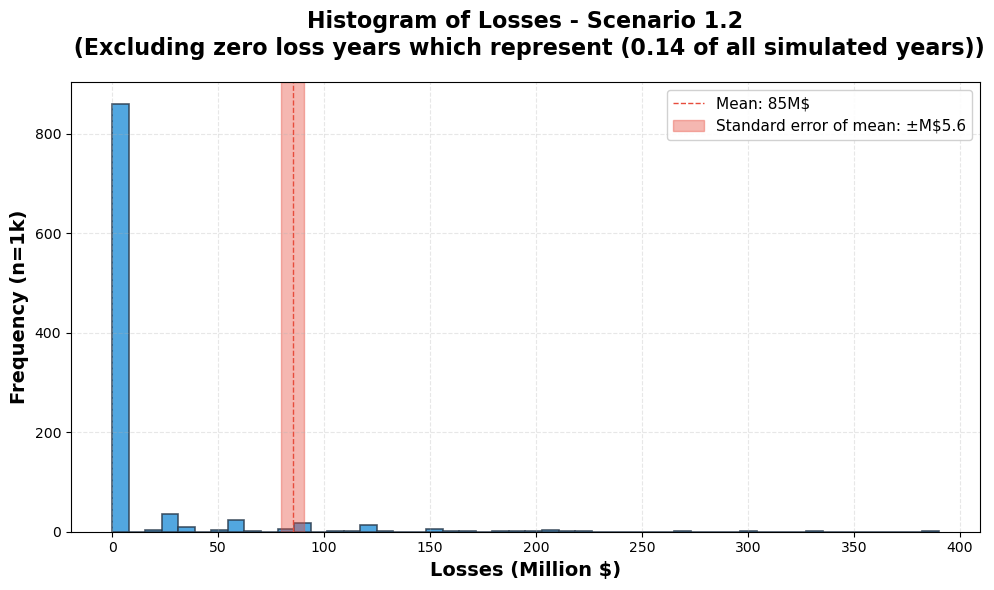

In [129]:
def plot_histogram(losslist, title='Histogram of Losses', bins=50, keepzeros=True):
    #creating histogram with mean, std of mean saving to file
    #keepzeros is a boolean that determines whether to include zero losses in the calculation of the mean and standard error of the mean, and whether to show the number of simulated years in the title. If keepzeros is False, zero losses are excluded from the calculations and the title is updated to reflect this.

    # Calculate statistics
    if keepzeros == True:
        
        mean_val = np.mean(losslist)

        std_val = np.std(losslist)
        sem_val = std_val / np.sqrt(len(losslist))  # Standard error of the mean
    elif keepzeros == False:
        n = len(losslist)
        numzeros = len([loss for loss in losslist if loss == 0])
        losslist_nonzero = [loss for loss in losslist if loss > 0]
        mean_val = np.mean(losslist_nonzero)
        sem_val = np.std(losslist_nonzero) / np.sqrt(len(losslist_nonzero))  # Standard error of the mean
        entries  =  len(losslist_nonzero)
        filename = title.replace("\n", "").replace(" ", "_")
        filename += "nozeros"
        filename = filename.replace("\n", "").replace(" ", "_")
        title += f'\n (Excluding zero loss years which represent ({entries/n:.2f} of all simulated years))'

    plt.figure(figsize=(10, 6))
    
    # Create histogramg
    n, bins, patches = plt.hist(losslist, bins=bins, alpha=0.85, 
                                  color='#3498db', edgecolor='#2c3e50', linewidth=1.2)
    # Add mean and median lines
    plt.axvline(mean_val, color='#e74c3c', linestyle='--', linewidth=1, 
                label=f'Mean: {mean_val:,.0f}M$')

    # Add shaded region for SEM around mean
    plt.axvspan(mean_val - sem_val, mean_val + sem_val, alpha=0.4, color='#e74c3c', 
                label=f'Standard error of mean: ±M${sem_val:,.1f}')
    

    
    # Styling
    plt.xlabel('Losses (Million $)', fontsize=14, fontweight='bold')
    plt.ylabel(f'Frequency (n={len(losslist)/1000:.0f}k)', fontsize=14, fontweight='bold')
    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
    plt.legend(fontsize=11, framealpha=0.9)
    
    # Improve layout
    plt.tight_layout()

    plt.savefig(outdirectory + filename + ".png", dpi=300)
    plt.show()

plot_histogram(losses_1_2, 'Histogram of Losses - Scenario 1.2', keepzeros=False)


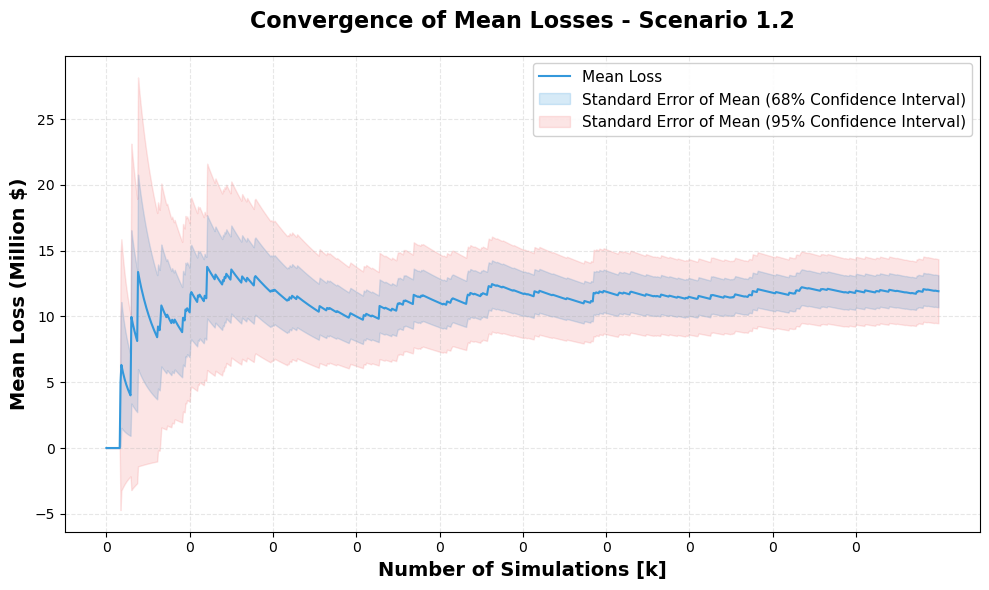

In [130]:
def plot_convergence(mean_loss_list, std_of_mean_loss_list, title='Convergence of Mean Losses', outdirectory="./results/"):
    
    #takes a list of mean values and a list of standard errors of the mean, and plots the convergence of the mean values with a shaded area representing the standard error of the mean.
    #The plot is saved to the results directory with a filename derived from the title.
    
    #the central limit theorem states that the distribution of the sample mean will approach a normal distribution as the sample size increases, regardless of the shape of the population distribution. This means that as we increase the number of simulations, the mean loss should converge to a stable value, and the standard error of the mean should decrease, indicating that our estimate of the mean loss is becoming more precise.
    plt.figure(figsize=(10, 6))
    plt.plot(mean_loss_list, label='Mean Loss', color='#3498db')
    plt.fill_between(range(len(mean_loss_list)), 
                     np.array(mean_loss_list) - np.array(std_of_mean_loss_list), 
                     np.array(mean_loss_list) + np.array(std_of_mean_loss_list), 
                     color='#3498db', alpha=0.2, label='Standard Error of Mean (68% Confidence Interval)')
    
    plt.fill_between(range(len(mean_loss_list)), 
                     np.array(mean_loss_list) - 2*np.array(std_of_mean_loss_list), 
                     np.array(mean_loss_list) + 2*np.array(std_of_mean_loss_list), 
                     color="#eb0808", alpha=0.1, label='Standard Error of Mean (95% Confidence Interval)')
    #making sure the axes are readable
    labellist = range(0, len(mean_loss_list), len(mean_loss_list)//10)
    # Styling
    plt.xlabel('Number of Simulations [k]', fontsize=14, fontweight='bold')
    plt.ylabel('Mean Loss (Million $)', fontsize=14, fontweight='bold')
    plt.xticks(labellist, [f"{x//1000}" for x in labellist])
    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
    plt.legend(fontsize=11, framealpha=0.9)
    
    # Improve layout
    plt.tight_layout()

    plt.savefig(outdirectory + title.replace(" ", "_") + ".png", dpi=300)
    plt.show()

plot_convergence(mean_loss_1_2, std_of_mean_loss_1_2, 'Convergence of Mean Losses - Scenario 1.2')


In [140]:
def get_conditional_probability(losslist: list, typelist: list, type_of_interest: list, cutoff: float = 0, housecutoff: int = 0, title="Conditional Probabilities of Types of Interest Given Losses Above Cutoff", outdirectory="./results/"):
    #takes losslist and event typelist as well as a list of types of interest and a cutoff value
    #calculates the conditional probability: if loss is higher than cutoff, what is the probablity that the type of interest properties are involved (and, or and exculsive or)
    
    #converting to numpy arrays for easier manipulation
    losslist = np.array(losslist)
    typelist = np.array(typelist, dtype=object)


    boollist = losslist > cutoff
    typelist_after_cutoff = typelist[boollist]

    #and condition: all types of interest must be involved
    counterand = 0
    for destr_props in typelist_after_cutoff:
        if all(proptype in destr_props for proptype in type_of_interest):
            counterand += 1

    #or condition: at least one type of interest must be involved
    counteror = 0
    for destr_props in typelist_after_cutoff:
        if any(proptype in destr_props for proptype in type_of_interest):
            counteror += 1
    
    #conditional probabilities that houses (more than cutoff) are involved
    counterhouse = 0
    for destr_props in typelist_after_cutoff:
        if len([prop for prop in destr_props if prop == "H"]) > housecutoff:
            counterhouse += 1
    
    total_events = len(typelist_after_cutoff)
    proband = counterand / total_events if total_events > 0 else 0
    probor = counteror / total_events if total_events > 0 else 0
    probhouse = counterhouse / total_events if total_events > 0 else 0
    return proband, probor, probhouse

print(list(get_conditional_probability(losses_1_2, types_1_2_events, ["Dr", "Shop"], cutoff=80, housecutoff=5)))
    


[0.0, 0.5396825396825397, 0.09523809523809523]
